In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

def flat_list(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]


We first load the "history.csv" file; 

In [2]:
history = pd.read_csv('../final/history.csv')
history.head()
end_date = max(pd.to_datetime(history['end_date'].values)) # largest end date
print('Number of distinct uids in database:', len(set(history['uid'])))

Number of distinct uids in database: 32023


Create history profiles: for each uid, associate all start, end dates;

In [3]:
# history_profiles = {}
# for uid in tqdm_notebook(set(history['uid'])):
#     history_profiles[uid] = {}
#     vals = history[history['uid'] == uid].values
#     for v in vals:
#         if np.isnan(v[1]):
#             pass
#         else:
#             history_profiles[uid][int(v[1])] = v[2], v[3]
# np.save('history_profiles', history_profiles)

history_profiles = np.load('../../derived_data/history_profiles.npy', allow_pickle=1).item()

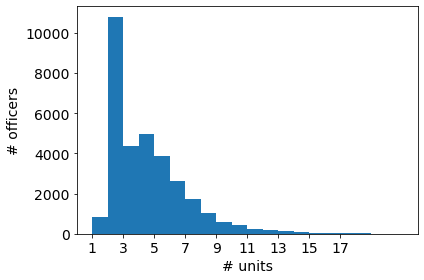

In [4]:
# distribution of number of units/officer

a = [len(history_profiles[individual_officer]) for individual_officer in history_profiles]
plt.hist(a, bins = 20)
plt.xlabel('# units', fontsize = 14)
plt.ylabel('# officers', fontsize = 14)
plt.xticks(np.arange(18)[::2], np.arange(1,19)[::2], fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()

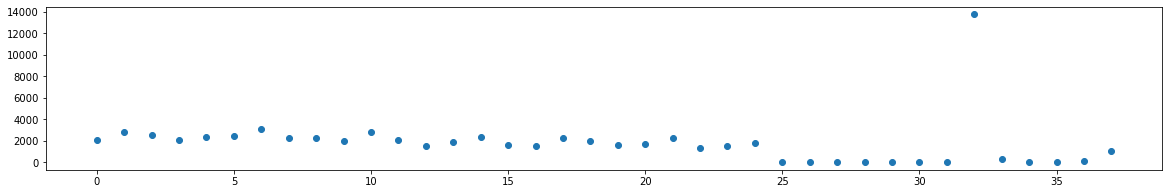

In [5]:
units_numbers = set(flat_list([list(history_profiles[k].keys()) for k in history_profiles]))
time_in_unit = {unit : 0 for unit in units_numbers}
plt.figure(figsize = (20,3))
for uid in history_profiles:
    for unit in history_profiles[uid]:
        time_in_unit[unit] += 1
max_unit, max_times = np.argmax([time_in_unit[u] for u in time_in_unit]), max([time_in_unit[u] for u in time_in_unit])
plt.scatter(np.arange(max_unit), [time_in_unit[v] for v in np.sort(list(units_numbers))[:max_unit]])
# plt.xticks(np.arange(len(units_numbers)), np.sort(list(units_numbers)))
plt.show()

In [ ]:
# potentially interesting questions:

# how much time does an officer spend in a unit?
# officer distribution across units as time varies? 

In [6]:
profiles = pd.read_csv('../final/profiles.csv')
profiles.head()

,last_name,first_name,middle_initial,gender,race,birthyear,age,status,appointment_date,position_no,...,star8,star9,star10,star11,sworn,unit_id,unit_detail,star,source,uid
0,ABBOTT,CARMELLA,A,F,NaN,NaN,32.0,NaN,2018-02-20,9161,...,NaN,NaN,NaN,NaN,Y,37.0,NaN,NaN,P4-41436,de78a795-cb26-472d-a66d-667ef937f3c0
1,ABDULLAH,LAKENYA,N,F,BLACK,NaN,37.0,NaN,2004-08-31,9111,...,NaN,NaN,NaN,NaN,N,8.0,NaN,50128.0,P4-41436,19bb7417-a3cc-42d6-98d8-ff87e6a9d039
2,ABFALL,RICHARD,C,M,WHITE,NaN,30.0,NaN,2017-05-16,9161,...,NaN,NaN,NaN,NaN,Y,16.0,11.0,10000.0,P4-41436,201bfaad-7b90-41d2-9dbd-4e430e458882
3,ABOUASSI,CHADI,,M,WHITE HISPANIC,NaN,26.0,NaN,2017-05-16,9161,...,NaN,NaN,NaN,NaN,Y,15.0,10.0,10523.0,P4-41436,9fd1429a-ff56-40d8-912a-91e9d2a30a29
4,ABOUZEID,TAMER,NaN,M,NaN,NaN,NaN,NaN,2018-02-23,1255,...,NaN,NaN,NaN,NaN,N,83.0,NaN,NaN,P4-41436,8bb6007d-6ffc-4033-8292-1fe4a2993e52


In [7]:
profiles.columns

Index(['last_name', 'first_name', 'middle_initial', 'gender', 'race',
       'birthyear', 'age', 'status', 'appointment_date', 'position_no',
       'position_description', 'unit_no', 'unit_description',
       'resignation_date', 'star1', 'star2', 'star3', 'star4', 'star5',
       'star6', 'star7', 'star8', 'star9', 'star10', 'star11', 'sworn',
       'unit_id', 'unit_detail', 'star', 'source', 'uid'],
      dtype='object')

In [8]:
# appointment date distribution
print('Number of distinct uids in database:', len(set(profiles['uid'])))
appointment_dates = pd.to_datetime(profiles['appointment_date'].values)
resignation_dates = pd.to_datetime(profiles['resignation_date'].values)

Number of distinct uids in database: 35450


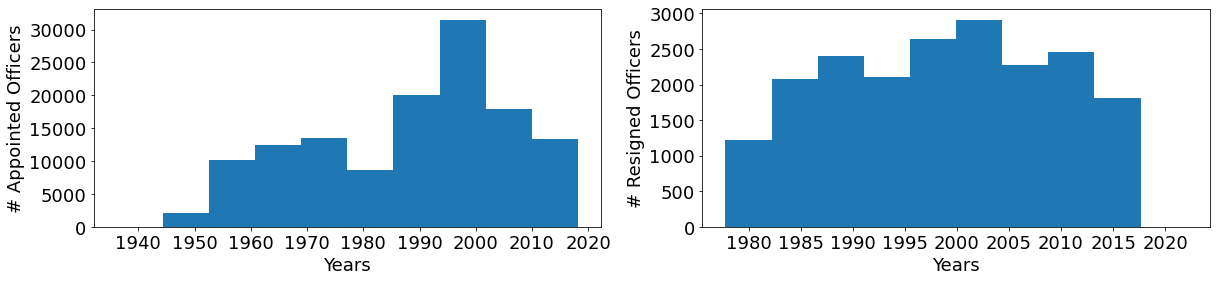

In [16]:
plt.figure(figsize = (20,4))
plt.subplot(121)
plt.hist(appointment_dates)
plt.xlabel('Years', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('# Appointed Officers', fontsize = 18)

plt.subplot(122)
plt.hist(resignation_dates)
plt.xlabel('Years', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('# Resigned Officers', fontsize = 18)
plt.show()

In [65]:
# total number of active officers

first_appointment_date, last_appointment_date = min(appointment_dates), max(appointment_dates)
delta_time = last_appointment_date - first_appointment_date
actives = (pd.to_datetime(profiles['appointment_date'].values) - first_appointment_date)/delta_time
inactives = (pd.to_datetime(profiles['resignation_date'].values) - first_appointment_date)/delta_time
inactives = np.nan_to_num(inactives, nan=1)
how_many_active = []
how_many_active_dropped_nans = []
range_time = np.linspace(0,1,50)
years = [convert_to_year(r, first_appointment_date, last_appointment_date) for r in range_time]
for r in range_time:
    how_many_active.append(np.sum((actives<r)*(inactives>r)))
    
def convert_to_year(range_time, low, high):
    delta_time = high-low
    full_date = low + range_time*delta_time
    return full_date.year


plt.figure()
plt.subplot(111)
plt.plot(years[1:-1], how_many_active[1:-1])
plt.ylabel()
plt.show()

In [85]:
profiles.dropna(subset=['appointment_date', 'resignation_date'])

,last_name,first_name,middle_initial,gender,race,birthyear,age,status,appointment_date,position_no,...,star8,star9,star10,star11,sworn,unit_id,unit_detail,star,source,uid
212,BASAVE SOTO,HECTOR,M,M,WHITE HISPANIC,1993.0,24.0,N,2017-01-17,9161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,e1317a1b-81bd-443e-b2e9-32388b20bf4f
278,BISCHOFF,ANDREW,,M,WHITE,1995.0,21.0,N,2016-10-31,9161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,4f65ea05-2641-4c6f-a40b-080d24ac75d2
360,BOWENS,DARREN,NaN,M,BLACK,NaN,46.0,NaN,2000-06-16,9182,...,NaN,NaN,NaN,NaN,N,83.0,NaN,NaN,P4-41436,1ada9f7d-c958-4a0a-b636-daedd9456aad
406,BROWN,DANITA,M,F,BLACK,NaN,56.0,NaN,1996-12-16,0665,...,NaN,NaN,NaN,NaN,N,83.0,NaN,NaN,P4-41436,b9e4a0f7-6090-4973-a757-a5ba2c63afb0
443,BRUMFIELD,LUCILLE,L,F,BLACK,NaN,48.0,NaN,1998-07-27,0832,...,NaN,NaN,NaN,NaN,N,83.0,NaN,NaN,P4-41436,128843f4-7992-4c45-8edf-b9e867a5a5ed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125306,STONE,DEAN,A,M,WHITE,1957.0,60.0,N,1986-12-22,9173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,ae17736b-e7d7-4dd1-937f-428f8d4872e9
125356,DUDA,TOMASZ,M,M,WHITE,1990.0,26.0,N,2014-09-29,9161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,da379d45-dd82-4fb8-90aa-4a3ba50190a8
125479,TRIPOLI,JOSEPH,A,M,WHITE,1961.0,55.0,N,1994-07-05,9161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,971e8a23-aa6d-4f46-98e8-838cb34d0a56
125487,RAMOS,DAVID,NaN,M,WHITE HISPANIC,1959.0,57.0,N,1994-07-05,9161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0-58155,89a31bc0-8794-4507-a2cc-5902a2f3f2f2


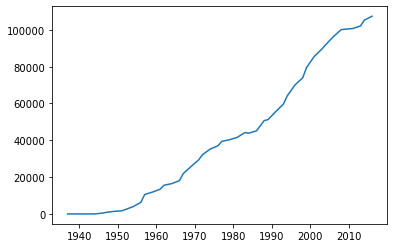

In [70]:
years[1:-1]

[1937,
 1939,
 1941,
 1942,
 1944,
 1946,
 1947,
 1949,
 1951,
 1952,
 1954,
 1956,
 1957,
 1959,
 1961,
 1962,
 1964,
 1966,
 1967,
 1969,
 1971,
 1972,
 1974,
 1976,
 1977,
 1979,
 1981,
 1983,
 1984,
 1986,
 1988,
 1989,
 1991,
 1993,
 1994,
 1996,
 1998,
 1999,
 2001,
 2003,
 2004,
 2006,
 2008,
 2009,
 2011,
 2013,
 2014,
 2016]